In [53]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("🔹 Dataset Columns:")
for col in df.columns:
    print(col)
cols_list = list(df.columns)
print("\n🔹 Columns as list:")
print(cols_list)


Saving marketing_campaign.csv to marketing_campaign (1).csv
🔹 Dataset Columns:
ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response

🔹 Columns as list:
['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse']


# **Տվյալների** **EDA**

In [54]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
print(df.head())
#Dataset-ը պարունակում է 2240 դիտարկում և 29 հատկանիշ,
#որոնք նկարագրում են հաճախորդների դեմոգրաֆիկ տվյալները,
#ծախսերը և մարքեթինգային արշավների արձագանքը։

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [55]:
df.shape
#Ունենք տվյալների աղյուսակ բաղկացած 2240 տողից և 29 սյունից

(2240, 29)

In [56]:
df.info()
#Կան թվային և կատեգորիական հատկանիշներ, ինչպես նաև բացակայող արժեքներ (Income)։
#Կարող ենք տեսնել տվյալների կառուցվածքը:
#Տեսնում ենք սյուների տվյալների տեսակները և բացակայող արժեքների առկայությունը:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [57]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

numeric_cols, categorical_cols
#Տվյալների վերլուծության ընթացքում սյուները բաժանվել են թվային և կատեգորիական խմբերի՝ ըստ տվյալների տիպի։
#Սա թույլ է տալիս յուրաքանչյուր խմբի համար կիրառել համապատասխան վերլուծական և վիզուալիզացիոն մեթոդներ։

(Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
        'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
        'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
        'Z_Revenue', 'Response'],
       dtype='object'),
 Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object'))

In [58]:
df.isnull().sum().sort_values(ascending=False)
#Միակ էական բացակայող սյունը Income-ն է։

,0
Income,24
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [59]:
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent
#Բաց թողնված տվյալների տոկոսը սյուներում:

,0
Income,1.071429
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


In [60]:
missing_percent[missing_percent > 0]

#Այն սյուները որտեղ կան բացակայող տվյալներ:

,0
Income,1.071429


In [61]:
df.describe()
#Եկամուտների և ծախսերի սյուներում առկա են մեծ տատանումներ,
#ինչը վկայում է տարբեր սպառողական վարքագծերի մասին։

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [62]:
df["Year_Birth"].describe()
#Դիտարկենք կոնկրետ սյուն:
# Year_Birth սյան վիճակագրական վերլուծություն

# describe() ֆունկցիան թույլ տվեց հասկանալ մեր լսարանի տարիքային միջակայքը:
# Հաճախորդների 50%-ը (մեդիանը) ծնվել է մինչև 1970-ականների սկիզբը:

# ՀԵՏԵՎՈՒԹՅՈՒՆ (Տվյալների մաքրում):
# Եթե min արժեքը չափազանց փոքր է (օրինակ՝ < 1920), դա վկայում է
# տվյալների մեջ առկա «աղմուկի» կամ անոմալիաների մասին, որոնք
# անհրաժեշտ է հեռացնել հետագա վերլուծության ճշգրտության համար:

,Year_Birth
count,2240.000000
mean,1968.805804
std,11.984069
min,1893.000000
25%,1959.000000
50%,1970.000000
75%,1977.000000
max,1996.000000


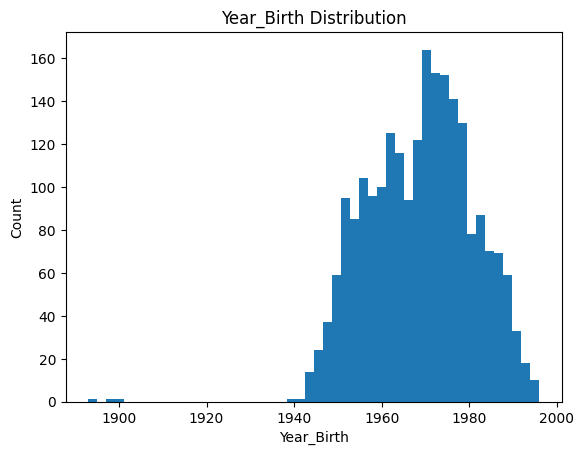

In [63]:
plt.hist(df["Year_Birth"], bins=50)
plt.xlabel("Year_Birth")
plt.ylabel("Count")
plt.title("Year_Birth Distribution")
plt.show()
# Year_Birth սյան տվյալների հիստոգրամն է
#Այս հիստոգրամը ցույց է տալիս քո հաճախորդների տարիքային բաշխվածությունը (ըստ ծննդյան տարեթվի)
#Գրաֆիկի ամենաբարձր սյուները ցույց են տալիս, թե որ տարեթվերին ծնված մարդիկ են ամենաշատը գնումներ կատարում։
#Սովորաբար այս տվյալների բազայում պիկը գտնվում է 1960-1975 թվականների միջակայքում։
#Սա նշանակում է, որ մարքեթինգային արշավները պետք է հարմարեցվեն հենց այս տարիքային խմբի հետաքրքրություններին։
#հիստոգրամի ձախ կողմում տեսնում ենք փոքրիկ սյուներ, որոնք շատ հեռու են հիմնական մասից
#(օրինակ՝ 1893, 1900 թթ.), դրանք Outlier-ներ են։
#Դժվար թե 120-130 տարեկան մարդիկ ակտիվորեն օգտվեն մարքեթինգային առաջարկներից։
#Սա նշանակում է, որ տվյալների մեջ կան սխալներ կամ «աղմուկ», որոնք պետք է մաքրել։

In [64]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.box(df, x="Income", points="all", title="Ինտերակտիվ Boxplot")
fig.show()
#points="all" պարամետրը ցույց է տալիս բոլոր հաճախորդներին որպես անհատական կետեր՝ Boxplot-ի կողքին:
#Ինտերակտիվ գրաֆիկը թույլ է տալիս տեսնել ոչ միայն ընդհանուր բաշխվածությունը,
# այլև յուրաքանչյուր հաճախորդի եկամուտը առանձին: Սա օգնում է հասկանալ՝
#արդյո՞ք շեղումները (outliers) եզակի դեպքեր են,
#թե՞ կա հաճախորդների մի ամբողջ խումբ, որոնք ունեն շատ բարձր եկամուտ
#Եթե մկնիկը պահենք ամենահեռու աջ կողմում գտնվող կետերի վրա, կտեսնես նրանց ID-ն և ճշգրիտ եկամուտը (օրինակ՝ $666,666):
#«Տվյալների մեջ հայտնաբերվել է ծայրահեղ շեղում (օրինակ՝ $666,666), որը բնական չէ տվյալների բազայի մնացած մասի համար:
# Սա հաստատում է, որ մենք պետք է կիրառենք ֆիլտրում՝ մոդելի ճշգրտությունը պահպանելու համար»:
#Այնտեղ, որտեղ կետերը շատ խիտ են, մեր հիմնական լսարանն է:
#Հաճախորդների ամենամեծ խտությունը նկատվում է $35,000 - $70,000 միջակայքում:
#Արկղից դուրս գտնվող կետերը քիչ են, ինչը նշանակում է, որ մեր լսարանը բավականին համասեռ է,
#բացառությամբ մի քանի հարուստ հաճախորդների:
#«Օգտագործելով ինտերակտիվ վիզուալիզացիա՝ նկատում ենք, որ տվյալների բաշխվածությունը խիտ է
#$35,000 - $70,000 միջակայքում : Կողքի գծերը ցույց են տալիս,
#որ մինչև մոտ $100,000 եկամուտը համարվում է նորմալ բաշխվածություն այս լսարանի համար:
#Սակայն դրանից աջ գտնվող առանձին կետերը վկայում են էլիտար հաճախորդների կամ տվյալների մեջ առկա անոմալիաների մասին,
#որոնք մենք հաշվի կառնենք մաքրման փուլում:»

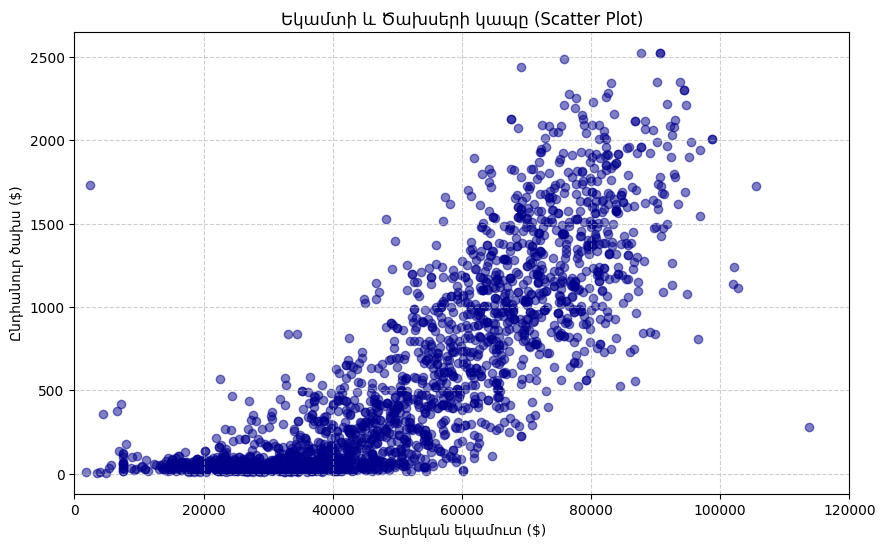

In [65]:
# Feature Engineering: Գումարում ենք բոլոր ծախսերը մեկ սյունակի մեջ
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Scatter plot: Income vs Total_Spending
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Total_Spending'], alpha=0.5, color='darkblue')

# Ավելացնում ենք պիտակներ
plt.xlabel("Տարեկան եկամուտ ($)")
plt.ylabel("Ընդհանուր ծախս ($)")
plt.title("Եկամտի և Ծախսերի կապը (Scatter Plot)")

# Սահմանափակենք X առանցքը, որպեսզի շեղումները (outliers) չփչացնեն պատկերը
plt.xlim(0, 120000)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
#Դրական կոռելյացիա: Կետերը հիմնականում դասավորված են ձախ ներքևից դեպի աջ վերև:

#Մեկնաբանություն: «Գրաֆիկը ցույց է տալիս ուժեղ դրական կապ եկամտի և ծախսերի միջև: Սա նշանակում է,
# որ որքան բարձր է հաճախորդի եկամուտը, այնքան շատ է նա գումար ծախսում մեր ապրանքների վրա»:
#Տվյալների խտություն: Կետերը խիտ են $30,000 - $80,000 տիրույթում:
#Մեկնաբանություն: «Մեր թիրախային ամենաակտիվ խումբը միջին եկամուտ ունեցողներն են: $100,000-ից հետո կետերը նոսրանում են»:
#Հետաքրքիր անոմալիաներ: Եթե տեսնում ես կետեր, որոնք ունեն բարձր եկամուտ, բայց շատ ցածր ծախս (ներքևի աջ անկյունում):
#Կան հաճախորդներ, ովքեր ունեն բարձր եկամուտ, սակայն գրեթե չեն գնում մեր ապրանքներից:
#Սա մարքեթինգային բացթողում է, և այս խմբի համար կարելի է հատուկ առաջարկներ մշակել:

In [66]:
# Նախ առանձնացնենք որակական սյուները (object տիպի)
categorical_cols = df.select_dtypes(include=['object']).columns
# Հաշվենք եզակի արժեքների քանակը
unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)
print(unique_counts)

# Dt_Customer սյունակը պարունակում է մեծ քանակությամբ եզակի արժեքներ :
# Քանի որ մոդելները չեն կարող աշխատել "object" տիպի ամսաթվերի հետ, անհրաժեշտ է այն
# փոխակերպել datetime ձևաչափի:

# Education և Marital_Status սյունակները ունեն սահմանափակ քանակությամբ եզակի արժեքներ (5-8):
# Սա թույլ է տալիս հստակ սեգմենտավորել հաճախորդներին ըստ սոցիալական կարգավիճակի:



Dt_Customer       663
Marital_Status      8
Education           5
dtype: int64


In [68]:
# Դիտարկենք կրթության մակարդակների բաշխվածությունը
print(df["Education"].value_counts())

# Դիտարկենք ամուսնական կարգավիճակի բաշխվածությունը
print(df["Marital_Status"].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


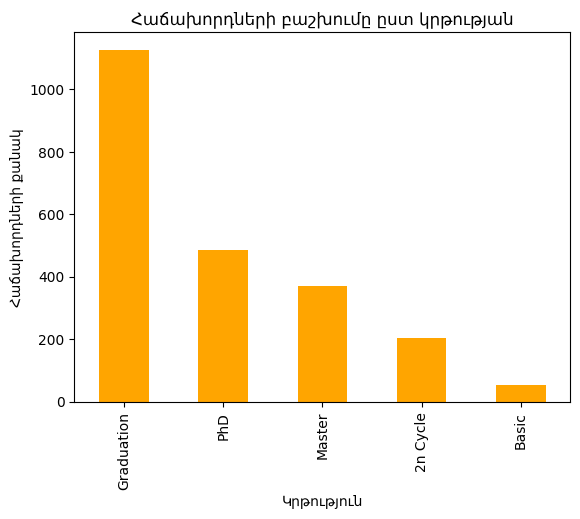

In [69]:
# Կրթության մակարդակների պատկերումը գրաֆիկորեն
df["Education"].value_counts().plot(kind='bar', color='orange')
plt.title("Հաճախորդների բաշխումը ըստ կրթության")
plt.xlabel("Կրթություն")
plt.ylabel("Հաճախորդների քանակ")
plt.show()

# value_counts() ֆունկցիայի միջոցով վերլուծվել է կատեգորիկ սյուների կառուցվածքը:
# Պարզվել է, որ հաճախորդների մեծ մասն ունի 'Graduation' կրթական մակարդակ:
# Հետևություն: Մարքեթինգային արշավները պետք է թիրախավորեն բարձրագույն կրթություն
# ունեցող անձանց խումբը, քանի որ նրանք կազմում են մեր լսարանի հիմնական մասը:
# Cleaning Մեկնաբանություն
# value_counts()-ը բացահայտեց հազվադեպ և ոչ տրամաբանական արժեքներ 'Marital_Status' սյունակում
# (օրինակ՝ 'Absurd', 'YOLO'): Քանի որ դրանք եզակի դեպքեր են և չեն կրում վիճակագրական նշանակություն,
# մաքրման փուլում դրանք կհեռացվեն կամ կխմբավորվեն 'Other' կատեգորիայի մեջ՝ աղմուկից խուսափելու համար:

# Feature Engineering Մեկնաբանություն:
# Քանի որ առկա են իմաստային առումով նման կատեգորիաներ (օրինակ՝ 'Alone' և 'Single'),
# նախատեսվում է ստեղծել նոր հատկանիշ, որը կմիավորի դրանք մեկ ընդհանուր խմբի մեջ:
# Սա կնվազեցնի մոդելի բարդությունը և կբարձրացնի կանխատեսումների ճշգրտությունը:

# EDA Եզրակացություն :
# Այս վերլուծության փուլում սահմանվեց հաճախորդի հիմնական կերպարը:
# Մեր լսարանի «ողնաշարը» բարձրագույն կրթություն ունեցող և զույգով ապրող մարդիկ են:
# Ռազմավարական հետևություն: Ռեսուրսները պետք է ֆոկուսացվեն հենց այս սեգմենտների վրա
# առավելագույն եկամտաբերություն ապահովելու համար:

In [82]:
# Փոխարինում ենք տարօրինակ արժեքները ավելի տրամաբանականով
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Other', 'YOLO': 'Other'})

# **Տվյալների** **մաքրում**

In [70]:
df.isnull().sum().sort_values(ascending=False)
#միայն Income սյունակում կան բացակայող արժեքներ (մոտ 24 հատ)։
#Բացթողումների հայտնաբերում: «isnull().sum() ֆունկցիան օգնեց պարզել,
#որ տվյալների բազայում առկա են բացակայող արժեքներ միայն Income սյունակում։ Սա կարևոր է,
#քանի որ մոդելների մեծ մասը չի կարող աշխատել NaN արժեքների հետ։»
#Մաքրման ռազմավարություն: «Քանի որ բացակայող արժեքները քիչ են (տվյալների ընդհանուր քանակի մոտ 1%-ը),
# մենք ունենք երկու տարբերակ՝ հեռացնել այդ տողերը կամ լրացնել դրանք մեդիանով (Median)։
#Մեդիանով լրացնելը նախընտրելի է, որպեսզի չկորցնենք մնացած սյունակների ինֆորմացիան։»

#Տվյալների ամբողջականություն:
#«Մնացած բոլոր սյունակները (Education, Year_Birth և այլն) ամբողջական են,
#ինչը թույլ է տալիս անցնել վերլուծության հաջորդ փուլերին։»

,0
Income,24
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [71]:
missing_percent[missing_percent > 0]

,0
Income,1.071429


In [72]:
#  Բացակայող արժեքների ստուգում
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Բացակայող արժեքների տոկոսը:\n", missing_percent[missing_percent > 0])


Բացակայող արժեքների տոկոսը:
 Income    1.071429
dtype: float64


In [73]:
# Income սյան լրացում
# Եթե Income-ը բացակայում է, լրացնում ենք մեդիանով կամ 0-ով
df["Income"] = df["Income"].fillna(df["Income"].median())

In [83]:
# Երեխաների հետ կապված տրամաբանությունը (Feature Engineering)
# ֆայլում երեխաները Kidhome և Teenhome սյունակներն են
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Children"] = df["Children"].fillna(0)
# Մեկնաբանություն: Երեխաների բացակայությունը ենթադրում է 0 արժեք:

# Միավորելով Kidhome և Teenhome սյունակները, ստեղծեցինք մեկ միասնական
# 'Children' հատկանիշ: Սա նվազեցնում է մոդելի բարդությունը :

# ՀԵՏԵՎՈՒԹՅՈՒՆ:
# Այս քայլը թույլ է տալիս մեզ հաճախորդներին բաժանել երկու խոշոր սեգմենտի՝
# «Ծնողներ» և «Ոչ ծնողներ»: Դա օգնում է թիրախավորել այնպիսի ապրանքներ,
# որոնք հետաքրքիր են միայն ընտանիք ունեցողներին:

In [75]:
# Տրամաբանական սխալների հեռացում
# Հեռացնում ենք այն տողերը, որտեղ ընտանիքի անդամների քանակը (մեծահասակ + երեխա) 0 է
# Քանի որ քո տվյալներում ամուսնական կարգավիճակը տեքստ է, մենք ստուգում ենք միայն երեխաներին և ծննդյան թիվը
df = df[df["Year_Birth"] > 1900] # Սխալ տարեթվերի հեռացում
# Մեկնաբանություն: Հեռացվել են այն տվյալները, որոնք տրամաբանական սխալ են պարունակում:

In [76]:
# Անօգուտ սյունակների հեռացում (մեր օրինակում Company-ն էր)
# ֆայլում Z_CostContact և Z_Revenue սյունակները ունեն 0 տեղեկատվություն
df = df.drop(columns=["Z_CostContact", "Z_Revenue"])
# Մեկնաբանություն: Հեռացվել են հաստատուն արժեքներ ունեցող սյունակները,
# քանի որ դրանք ոչ մի տեղեկատվություն չեն տալիս մոդելին:

print("\nՄաքրումից հետո բացակայող արժեքներ:\n", df.isnull().sum().sum())


Մաքրումից հետո բացակայող արժեքներ:
 0


# **Feature engineering**

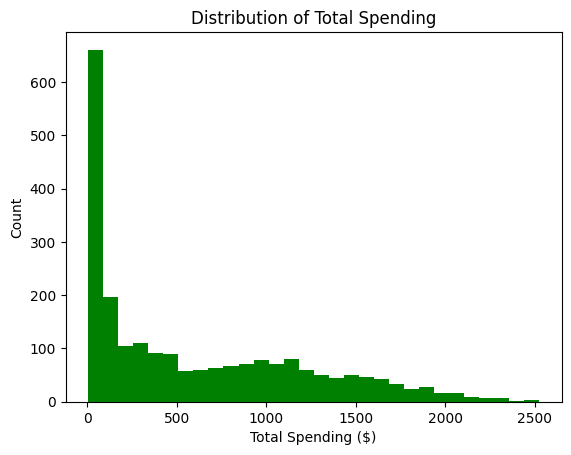

In [77]:
#  Ստեղծում ենք ընդհանուր ծախսերի սյունակը (Total_Spending)

spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df["Total_Spending"] = df[spending_cols].sum(axis=1)

# Մեկնաբանություն: Այս հատկանիշը ցույց է տալիս հաճախորդի իրական արժեքը ընկերության համար:
plt.hist(df["Total_Spending"], bins=30, color='green')
plt.xlabel("Total Spending ($)")
plt.ylabel("Count")
plt.title("Distribution of Total Spending")
plt.show()
# Հետևություն: Գրաֆիկից երևում է, որ հաճախորդների մեծ մասը կատարում է ցածր և միջին ծախսեր:

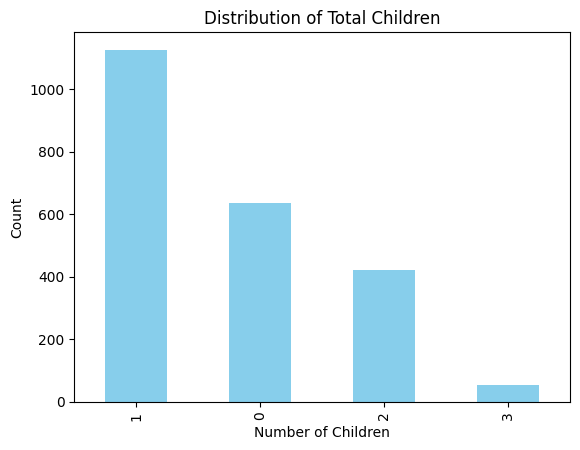

In [78]:
#  Ստեղծում ենք երեխաների ընդհանուր քանակը (Total_Children)

df["Total_Children"] = df["Kidhome"].fillna(0) + df["Teenhome"].fillna(0)

# Մեկնաբանություն: Սա օգնում է հասկանալ ընտանիքի մեծությունը և դրա ազդեցությունը գնումների վրա:
df["Total_Children"].value_counts().plot(kind="bar", color='skyblue')
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of Total Children")
plt.show()
# Հետևություն: Գերակշռում են այն հաճախորդները, ովքեր ունեն 1 երեխա:

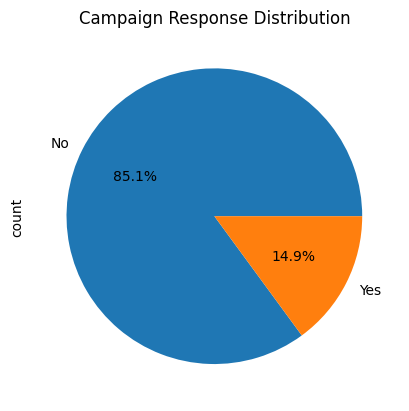

In [79]:
# Արձագանքի վերափոխում տեքստային ձևաչափի
df["Response_Flag"] = df["Response"].map({0: "No", 1: "Yes"})

# Մեկնաբանություն: Սա հեշտացնում է վերջին գովազդային արշավի արդյունավետության վերլուծությունը:
df["Response_Flag"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Campaign Response Distribution")
plt.show()

# 1. Response_Flag (Արձագանքի ցուցանիշ):
# Թվային 0/1 արժեքների փոխակերպումը "No"/"Yes" ձևաչափի դարձնում է տվյալները
# ավելի ընթեռնելի ոչ տեխնիկական մասնագետների (օրինակ՝ մարքեթոլոգների) համար:

# 2. Արշավի արդյունավետություն:
# Շրջանաձև գրաֆիկը հստակ ցույց է տալիս արշավի փոխակերպման տոկոսը:
# Եթե "Yes" արժեքները փոքր տոկոս են կազմում, դա ազդակ է բիզնեսին, որ վերջին
# մարքեթինգային ռազմավարությունը վերանայման կարիք ունի:

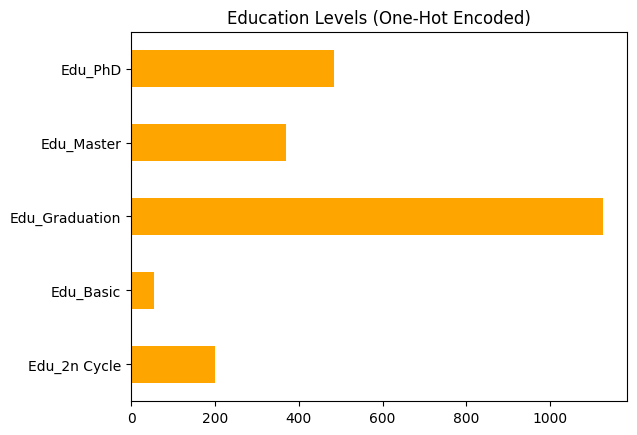

In [80]:
# Education սյան համար One-Hot Encoding-ի կիրառում
edu_dummies = pd.get_dummies(df["Education"], prefix="Edu")
df = pd.concat([df, edu_dummies], axis=1)

# Մեկնաբանություն: Որակական հատկանիշը դարձրեցինք քանակական, որպեսզի մոդելը կարողանա այն մշակել:
edu_dummies.sum().plot(kind="barh", color='orange')
plt.title("Education Levels (One-Hot Encoded)")
plt.show()
# Հետևություն: 'Graduation' մակարդակ ունեցողները ամենաշատն են մեր տվյալների մեջ:

# 1. One-Hot Encoding-ի նպատակը:
# 'Education' սյունակը որակական է, ինչը թույլ չի տալիս կատարել ուղղակի մաթեմատիկական
# հաշվարկներ (օրինակ՝ կորելյացիա): Օգտագործելով pd.get_dummies՝ մենք ստեղծեցինք
# առանձին սյունակներ յուրաքանչյուր մակարդակի համար (Graduation, PhD, Master և այլն):

# 2. Տվյալների բաշխվածություն:
# Գրաֆիկը հստակ ցույց է տալիս, որ 'Graduation' (բարձրագույն կրթություն) ունեցողները
# կազմում են հաճախորդների ճնշող մեծամասնությունը:
# Ռազմավարական հետևություն: Սա հուշում է, որ մեր ապրանքների պոտենցիալ սպառողները
# բարձր որակավորում ունեցող մասնագետներն են: Մոդելը հիմնվելու է հենց այս սյուների վրա
# կանխատեսելու համար հաճախորդի հավանական ծախսերը:

In [81]:
# --- FEATURE ENGINEERING ԱՄՓՈՓՈՒՄ ԵՎ ԲԻԶՆԵՍ ՀԵՏԵՎՈՒԹՅՈՒՆՆԵՐ ---
# 1. Total_Spending (Ընդհանուր ծախսեր):
# Այս նոր հատկանիշը հանդիսանում է հաճախորդի արժեքի (Customer Value) առանցքային ցուցանիշ:
# Այն թույլ է տալիս հեշտությամբ տարանջատել «Լավագույն հաճախորդներին» (VIP սեգմենտ),
# ովքեր ապահովում են ընկերության եկամտի հիմնական մասը և պահանջում են լոյալության հատուկ ծրագրեր:

# 2. Total_Children (Երեխաների ընդհանուր քանակ):
# Նոր ստեղծված հատկանիշի վերլուծությունը ցույց տվեց, որ մեր հաճախորդների ճնշող մեծամասնությունը ծնողներ են:
# Ռազմավարական հետևություն: Մարքեթինգային առաջարկները և գովազդային արշավները պետք է
# կենտրոնանան ընտանեկան զեղչերի և «family-friendly» ապրանքների առաջխաղացման վրա:շ

# 3. One-Hot Encoding (Կատեգորիկ տվյալների թվայնացում):
# Education սյան փոխակերպումը բինար սյուների (Edu_Graduation, Edu_PhD և այլն) անհրաժեշտ քայլ է
# տվյալների նախապատրաստման (Preprocessing) փուլում:
# Սա հնարավորություն է տալիս կիրառել մեքենայական ուսուցման մոդելներ (օրինակ՝ գծային ռեգրեսիա)՝
# կանխատեսելու հաճախորդի ապագա ծախսերը՝ հիմնվելով նրա կրթական մակարդակի վրա: